In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the datasets and combine into one

accidents_2005 = pd.read_csv(r"C:\Users\tom_r\Desktop\UK Traffic Accidents\Data-Science\UK Traffic Accidents\data\accidents_2005_to_2007.csv")
accidents_2009 = pd.read_csv(r"C:\Users\tom_r\Desktop\UK Traffic Accidents\Data-Science\UK Traffic Accidents\data\accidents_2009_to_2011.csv")
accidents_2012 = pd.read_csv(r"C:\Users\tom_r\Desktop\UK Traffic Accidents\Data-Science\UK Traffic Accidents\data\accidents_2012_to_2014.csv")

C:\Users\tom_r\AppData\Local\Temp\ipykernel_16636\1751687408.py:3: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents_2005 = pd.read_csv(r"C:\Users\tom_r\Desktop\UK Traffic Accidents\Data-Science\UK Traffic Accidents\data\accidents_2005_to_2007.csv")
C:\Users\tom_r\AppData\Local\Temp\ipykernel_16636\1751687408.py:5: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents_2012 = pd.read_csv(r"C:\Users\tom_r\Desktop\UK Traffic Accidents\Data-Science\UK Traffic Accidents\data\accidents_2012_to_2014.csv")


In [3]:
# inspect data
accidents_2005.head(10)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005
5,200501BS00006,524770.0,181160.0,-0.203238,51.515540,1,3,2,1,11/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,Ol or diesel,NaN,1,Yes,E01002832,2005
6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,1,3,2,1,13/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002875,2005
7,200501BS00009,525890.0,179710.0,-0.187623,51.502260,1,3,1,2,14/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002889,2005
8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,1,3,2,2,15/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002900,2005
9,200501BS00011,524550.0,180810.0,-0.206531,51.512443,1,3,2,5,15/01/2005,...,Central refuge,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002875,2005


In [5]:
print("2005: ", len(accidents_2005),"\n2009: ", len(accidents_2009),"\n2012: ", len(accidents_2012), "\n\n")
print(accidents_2005.info())

2005:  570011 
2009:  469442 
2012:  464697 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570011 entries, 0 to 570010
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               570011 non-null  object 
 1   Location_Easting_OSGR                        569910 non-null  float64
 2   Location_Northing_OSGR                       569910 non-null  float64
 3   Longitude                                    569910 non-null  float64
 4   Latitude                                     569910 non-null  float64
 5   Police_Force                                 570011 non-null  int64  
 6   Accident_Severity                            570011 non-null  int64  
 7   Number_of_Vehicles                           570011 non-null  int64  
 8   Number_of_Casualties                         570011 non-null  int64  
 9   Date        

In [6]:
if(accidents_2005.columns.values.all() == accidents_2009.columns.values.all() == accidents_2012.columns.values.all()):
    print('Columns Match')
else:
    print('Column mismatch')

if(accidents_2005.dtypes.values.all() == accidents_2009.dtypes.values.all() == accidents_2012.dtypes.values.all()):
    print('Data types Match')
else:
    print('Data Type mismatch')

Columns Match
Data types Match


In [7]:
# concatenate the data into one dataset

dataset = pd.concat([accidents_2005, accidents_2009, accidents_2012], ignore_index = True)
print(len(dataset))
dataset.head()

1504150


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


# Initial Questions? 
- How does day of the week impact acccidents?
- How does time of day impact accidents?
- How have the number of accidents changed over time?
- How do road conditions and weather conditions effect accidents numbers and severity?
- Can we forecast the 2012 to 2015 data from the previous data?


### How does the day of the week impact the number of accidents?

In [8]:
dataset['Day_of_Week'].unique()

array([3, 4, 5, 6, 2, 7, 1])

In [9]:
week_mapping = {
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday',
    7 : 'Sunday'
}

dataset['Day'] = dataset['Day_of_Week'].map(week_mapping)
dataset['Day'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Tuesday', 'Sunday',
       'Monday'], dtype=object)

In [10]:
dataset['Day'].value_counts()

Day
Saturday     247137
Friday       226411
Thursday     226359
Wednesday    224110
Tuesday      213748
Sunday       201413
Monday       164972
Name: count, dtype: int64

dict_values(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


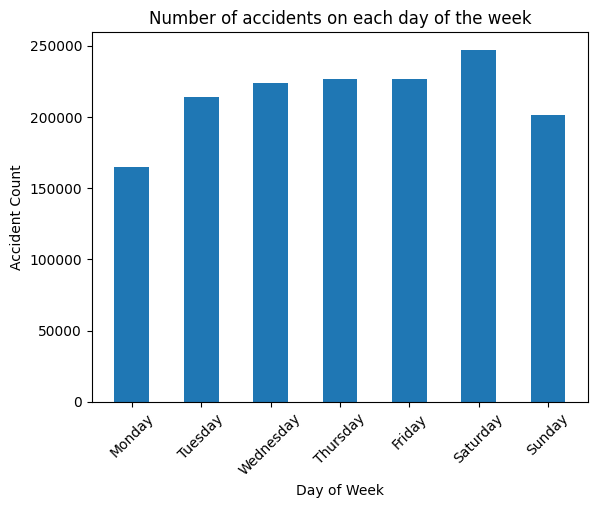

In [23]:
day_counts = dataset['Day'].value_counts()

weekday_order = week_mapping.values()
print(weekday_order)

day_counts = day_counts.reindex(weekday_order)

plt.bar(day_counts.index, day_counts.values, width = 0.5)
plt.ylabel("Accident Count")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.title("Number of accidents on each day of the week")

plt.show()

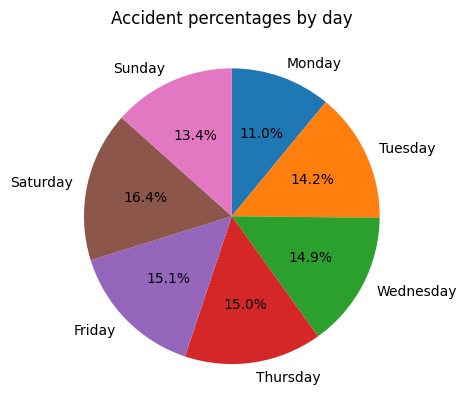

In [34]:
plt.pie(x=day_counts.values, labels=day_counts.index, autopct='%1.1f%%', counterclock=False, startangle=90)
plt.title("Accident percentages by day")
plt.show()

### How does the time of day impact the number of accidents? 

In [53]:
print(dataset['Time'].value_counts())

Time
17:00    14765
17:30    14036
16:00    13434
18:00    13194
15:30    13170
         ...  
04:54       50
04:01       49
04:34       48
04:41       45
04:46       43
Name: count, Length: 1439, dtype: int64


In [72]:
dataset['Time_bin'] = pd.to_datetime(dataset['Time'], format='%H:%M')
dataset['Time_bin'] = dataset['Time_bin'].dt.floor('30min').dt.strftime('%H:%M')

accident_times = dataset['Time_bin'].value_counts().sort_index()

# Convert to list of strings
time_labels = accident_times.index.tolist()

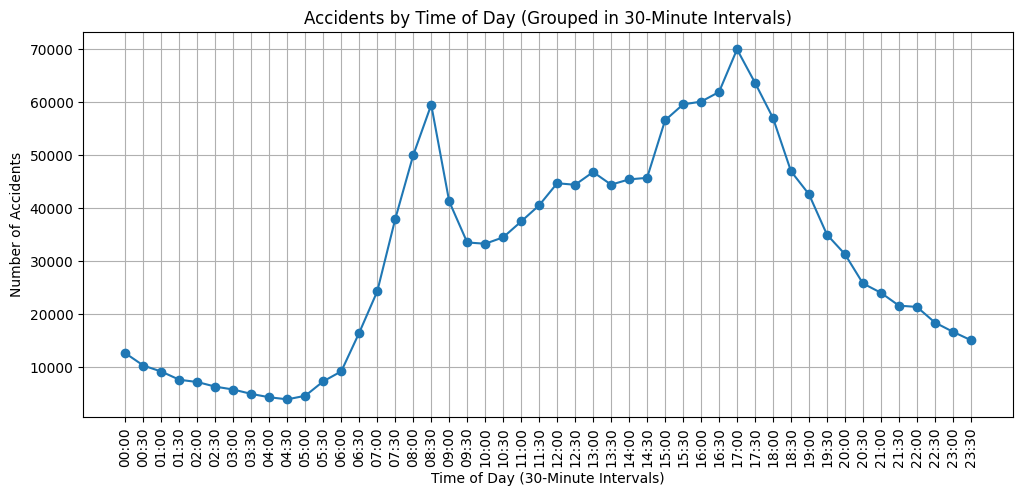

In [73]:

# Plot a line graph showing the total number of accidents in each 30 min bin
plt.figure(figsize=(12, 5))
plt.plot(time_labels, accident_times.values, marker='o', linestyle='-')
plt.xlabel('Time of Day (30-Minute Intervals)')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Time of Day (Grouped in 30-Minute Intervals)')
plt.xticks(rotation=90)
plt.grid(True)

plt.show()

The graph above shows that there are two distinct peaks which correspond to usual rush hour peak traffic periods. 

### How has the number of accidents changed over time? 

In [109]:
dt = dataset.copy()
dt['Date'] = pd.to_datetime(dt['Date'], format='%d/%m/%Y')
dt['Month_Year'] = dt['Date'].dt.to_period('M') 

In [110]:
accident_dates = dt['Month_Year'].value_counts().sort_index()

accident_dates.index = accident_dates.index.to_timestamp()

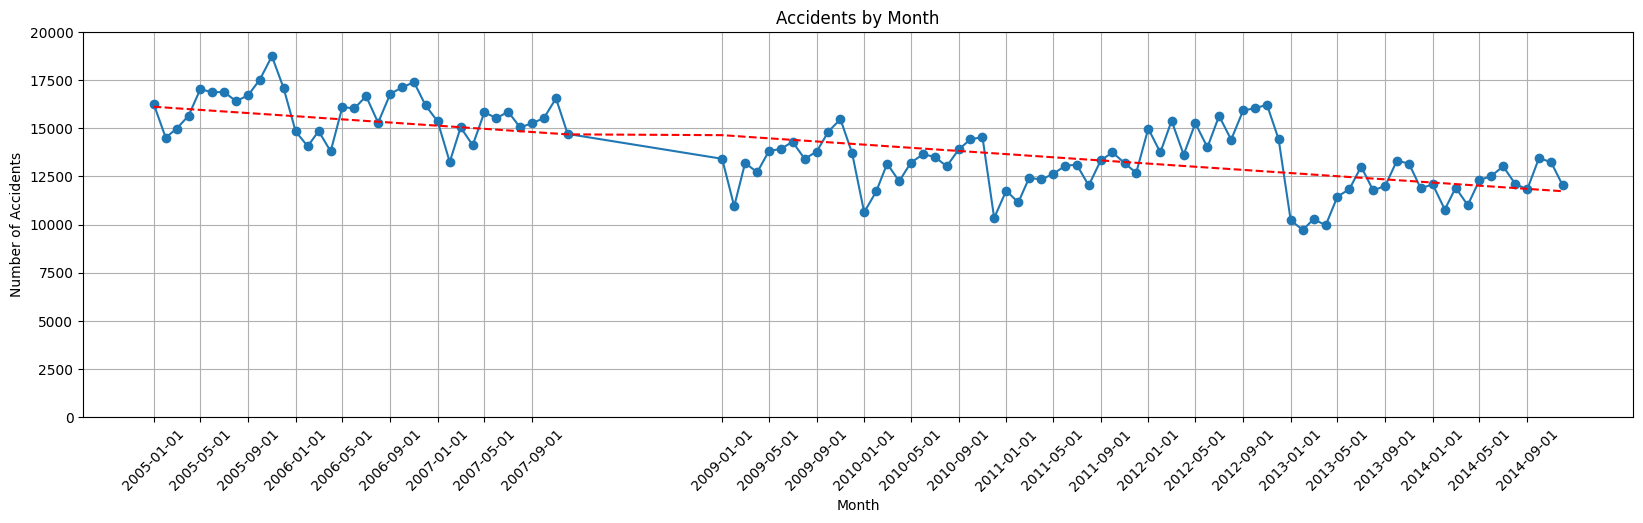

In [119]:
step = 4
x_labels = accident_dates.index[::step]

plt.figure(figsize=(20, 5))
plt.plot(accident_dates.index, accident_dates.values, marker='o', linestyle='-')

# generate a trend line over the monthly accident values
x_numeric = np.arange(len(accident_dates.index))
y_values = accident_dates.values
trend_poly = np.polyfit(x_numeric, y_values, 1)
trend_line = np.poly1d(trend_poly)
trend_values = trend_line(x_numeric)

plt.plot(accident_dates.index, trend_values, color='red', linestyle='--')

plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Month')
plt.xticks(x_labels, rotation=45)
plt.ylim(0, 20000)
plt.grid(True)

plt.show()